In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Plantvillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

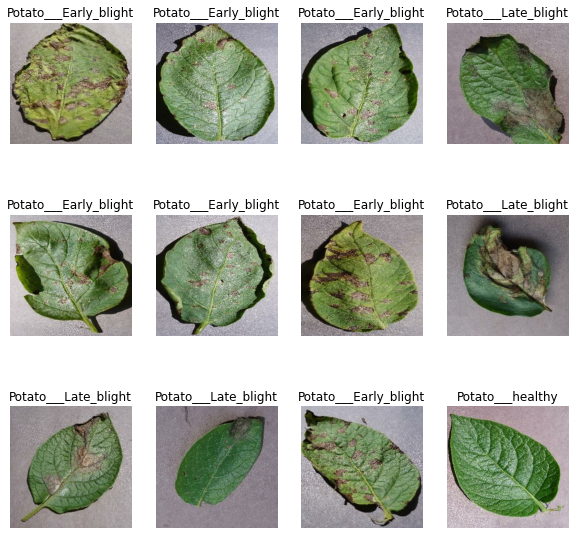

In [5]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
#         print(image_batch[i].shape)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [6]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [7]:
train_ds = dataset.take(54)
len(train_ds)

54

In [8]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [9]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [10]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [13]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

54

In [15]:
len(val_ds)

6

In [16]:
len(test_ds)

8

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_val = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation =  tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [21]:
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 30s 183ms/step - loss: 0.8796 - accuracy: 0.5087 - val_loss: 0.7578 - val_accuracy: 0.6406
Epoch 2/50
54/54 [==============================] - 5s 99ms/step - loss: 0.5808 - accuracy: 0.7049 - val_loss: 0.3515 - val_accuracy: 0.8125
Epoch 3/50
54/54 [==============================] - 5s 96ms/step - loss: 0.4972 - accuracy: 0.7633 - val_loss: 0.4277 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 5s 92ms/step - loss: 0.3849 - accuracy: 0.8328 - val_loss: 0.3264 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 6s 107ms/step - loss: 0.3498 - accuracy: 0.8542 - val_loss: 0.2752 - val_accuracy: 0.8698
Epoch 6/50
54/54 [==============================] - 5s 89ms/step - loss: 0.2715 - accuracy: 0.8895 - val_loss: 0.3836 - val_accuracy: 0.8594
Epoch 7/50
54/54 [==============================] - 5s 87ms/step - loss: 0.2324 - accuracy: 0.9115 - val_loss: 0.2927 - val_accuracy: 0.9167
Epoch 8/50

In [25]:
score = model.evaluate(test_ds)

8/8 [==============================] - 1s 69ms/step - loss: 0.0146 - accuracy: 0.9914


In [26]:
score


[0.01458104606717825, 0.9913793206214905]

In [27]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history.history['accuracy']

[0.5086805820465088,
 0.7048611044883728,
 0.7633101940155029,
 0.8327546119689941,
 0.8541666865348816,
 0.8894675970077515,
 0.9114583134651184,
 0.9490740895271301,
 0.9346064925193787,
 0.9403935074806213,
 0.8813657164573669,
 0.9346064925193787,
 0.9502314925193787,
 0.9548611044883728,
 0.9542824029922485,
 0.9519675970077515,
 0.9774305820465088,
 0.9722222089767456,
 0.9774305820465088,
 0.9809027910232544,
 0.9913194179534912,
 0.9895833134651184,
 0.9872685074806213,
 0.9884259104728699,
 0.9722222089767456,
 0.9629629850387573,
 0.9722222089767456,
 0.9855324029922485,
 0.9913194179534912,
 0.9878472089767456,
 0.9878472089767456,
 0.9936342835426331,
 0.9421296119689941,
 0.9635416865348816,
 0.9861111044883728,
 0.9901620149612427,
 0.9832175970077515,
 0.9895833134651184,
 0.9872685074806213,
 0.9930555820465088,
 0.9942129850387573,
 0.9971064925193787,
 0.9959490895271301,
 0.9855324029922485,
 0.9901620149612427,
 0.9982638955116272,
 0.9982638955116272,
 0.9594907164

In [30]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

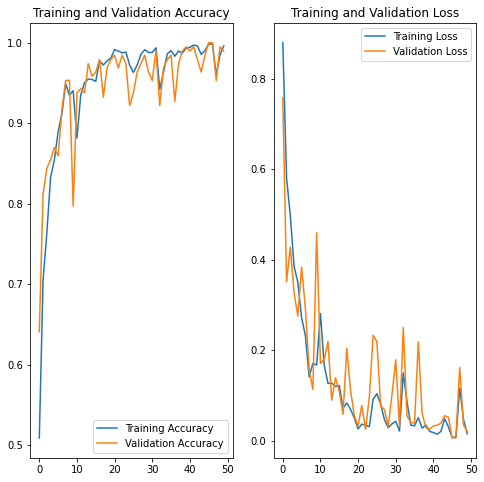

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

First Image to predict:
Actual Label:  Potato___Early_blight
Predicted Label:  Potato___Early_blight


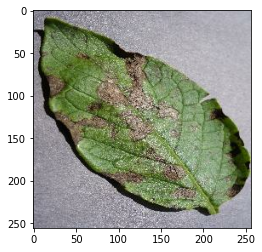

In [32]:
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image to predict:")
    plt.imshow(first_image)
    print("Actual Label: ",class_names[first_label])
    batch_prediction= model.predict(image_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [33]:
batch_prediction[0]

array([9.9999750e-01, 2.5505378e-06, 2.6632403e-14], dtype=float32)

In [34]:
def predict_cnn(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

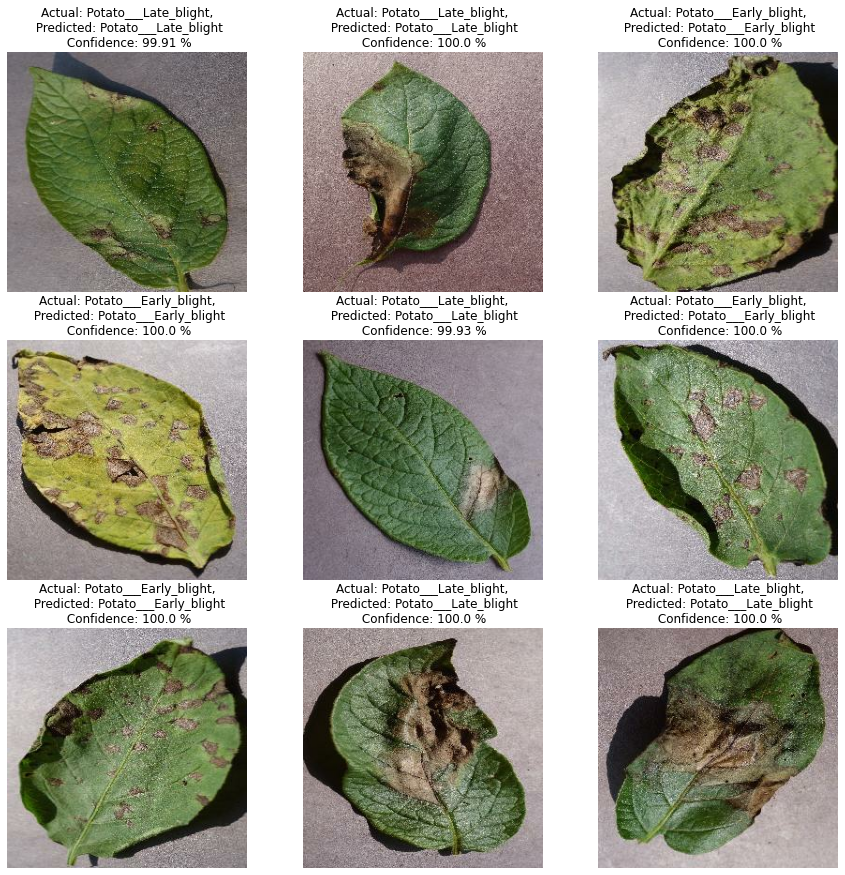

In [35]:
plt.figure(figsize=(15,15))
for image,label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        predicted_class,confidence = predict_cnn(model,image[i].numpy())
        actual_class = class_names[label[i]]
        
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}\n Confidence: {confidence} %")
        
        plt.axis('off')
    

In [36]:
import os
model_version = max([int(i) for i in os.listdir("models")+[0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/5\assets
